<a href="https://colab.research.google.com/github/rezippel/Notes/blob/main/Puzzle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I noticed the following puzzle online.  If
$$x + \frac{1}{x} = 3,$$
then what is the value of
$$x - \frac{1}{x}?$$



Presumably, the desired solution is based on observing that
$$\left( x + \frac{1}{x}\right)^2 = x^2 + 2 + \frac{1}{x^2},$$
and
$$\left( x - \frac{1}{x}\right)^2 = x^2 - 2 + \frac{1}{x^2}.$$
Combining with the first equation we have
$$\left( x - \frac{1}{x}\right)^2
   = \left( x + \frac{1}{x}\right)^2 - 4
   = 3^2 - 4.$$
Taking square roots,
$$ x - \frac{1}{x} = \pm\sqrt{5}.$$

Which of these two values is the answer to our question? In fact, either meets the initial requirements $x + 1/x = 3$ eo both values are correct answers to the question. In fact, it probably would have been better to stop just before taking the square root and saying that the zeroes of
$$Z^2 - 5$$
are equally possible values for $x - 1/x$.

There are some generalizations and variants of this trick that can be used, but instead, we going to follow a brute force solution:

Solve the first equation for $x$ and plug that in to the second equation. Since this is a polynomial equation of degree two we expect there to be two distinct zeroes.

In [1]:
from sympy import *
init_printing()
x = symbols('x')
sols = solve(x + 1/x - 3, x)
sols

⎡3   √5  √5   3⎤
⎢─ - ──, ── + ─⎥
⎣2   2   2    2⎦

Substituting these solutions into $x - 1/x$ we have the two values:

In [2]:
[simplify((x - 1/x).subs(x, sols[0])),
 simplify((x - 1/x).subs(x, sols[1]))]

[-√5, √5]

This gives the same result as before.

The generalization of this approach is to use the *resultant* of two polynomials.

If $f(x)$ and $g(x)$ are polynomials over a field $k$, then
$$\mathop{\rm res}_x f(x), g(x) = \prod_{\alpha} g(\alpha) = \prod_{\beta} f(\beta) = \prod_{\alpha, \beta} (\alpha - \beta).$$

The expressions we have are rational function, but their denominators are just $x$. The following code computes the numeriator and denominator of the two expressions.

In [3]:
x, Z = symbols('x Z')
f, f_den = (x + 1/x - 3).as_numer_denom()
g, g_den = (x - 1/x - Z).as_numer_denom()
[f, g]

[x⋅(x - 3) + 1, x⋅(-Z + x) - 1]

In [4]:
resultant(f, g, x)

 2    
Z  - 5

In [5]:
x, y, z, a, b, c = symbols('x y z a b c')
f = x + y + z - a
g = x**2 + y**2 + z**2 - b
h = x**3 + y**3 + z**3 - c
[f, g, h]

⎡                      2    2    2        3    3    3⎤
⎣-a + x + y + z, -b + x  + y  + z , -c + x  + y  + z ⎦

In [6]:
p = factor(resultant(resultant(f, g, x), resultant(f, h, x), y))
p

                                                     2
⎛   3      2                  2                    3⎞ 
⎝- a  + 3⋅a ⋅z + 3⋅a⋅b - 6⋅a⋅z  - 3⋅b⋅z - 2⋅c + 6⋅z ⎠ 

In [7]:
pp =powdenest(sqrt(p), force=True)

In [8]:
factor(resultant(pp, diff(pp, z), z))

     ⎛ 6      4        3         2  2                 3       2⎞
1296⋅⎝a  - 9⋅a ⋅b + 8⋅a ⋅c + 21⋅a ⋅b  - 36⋅a⋅b⋅c - 3⋅b  + 18⋅c ⎠

In [9]:
factor(1296)

1296

This is a special case of the problem, if $f(x) = c_1$, then what values
can $g(x)$ take on? Generalizing the technique used in puzzle above, we found a function $F$ such that
$$F(g(x)) = F(f(x)) + c_2.$$
The $g(x)$ could be computed as
$$g(x) = F^{-1}(f(c_1) + c_2).$$  

Instead, we'll take a different approach. The key idea is to take an even more brut force approach to this problem. Let $x_1$ be a zero of $f(x) - c_1$

Let the zeroes of $f(x) - c_1$ be $\{x_1, x_2, \ldots, x_n\}$.

Let the coefficients of $f(x) - c_1$ be elements of the field $k$.

In [10]:
integrate(sin(x**2), (x, -oo, oo))

√2⋅√π
─────
  2  

In [11]:
y = Function('y')
y(x).diff(x)

d       
──(y(x))
dx      

In [13]:
from sympy.polys.dispersion import dispersion, dispersionset
dispersion(x**4+x+1, (x-a)**4+(x-a)+1, x)

-∞

In [28]:
f = factor(resultant(x**4+x+1, (x-a)**4+(x-a)+1, x))/a**4
f

 12      8       6        4        2      
a   + 8⋅a  + 26⋅a  - 112⋅a  + 216⋅a  + 229

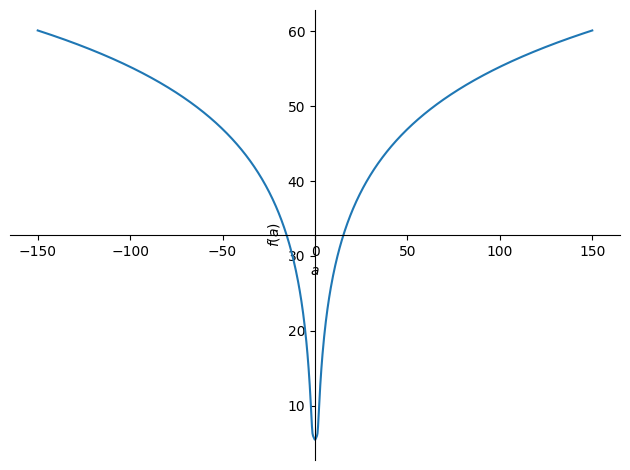

In [39]:
plot(log(f), (a, -150, 150))